In [11]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import MeanShift
import matplotlib.pyplot as plt

In [5]:
X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=.7, random_state=0)

meanshift = MeanShift(bandwidth=0.8)
cluster_labels = meanshift.fit_predict(X)
print(len(np.unique(cluster_labels)), ":", np.unique(cluster_labels))

6 : [0 1 2 3 4 5]


In [6]:
meanshift = MeanShift(bandwidth=1.)
cluster_labels = meanshift.fit_predict(X)
print(len(np.unique(cluster_labels)), ":", np.unique(cluster_labels))

3 : [0 1 2]


In [7]:
from sklearn.cluster import estimate_bandwidth

bandwidth = estimate_bandwidth(X)
print("optimal bandwidth : ", bandwidth)

optimal bandwidth :  1.8158484154517098


In [9]:
import pandas as pd

clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y

best_bandwidth = estimate_bandwidth(X)

meanshift = MeanShift(bandwidth=best_bandwidth)
cluster_labels = meanshift.fit_predict(X)
print(np.unique(cluster_labels))

[0 1 2]


In [10]:
clusterDF['target_clusted'] = meanshift.labels_

In [14]:
clusterDF.groupby('target')['target_clusted'].value_counts()

target  target_clusted
0       0                 67
1       1                 67
2       2                 66
Name: target_clusted, dtype: int64

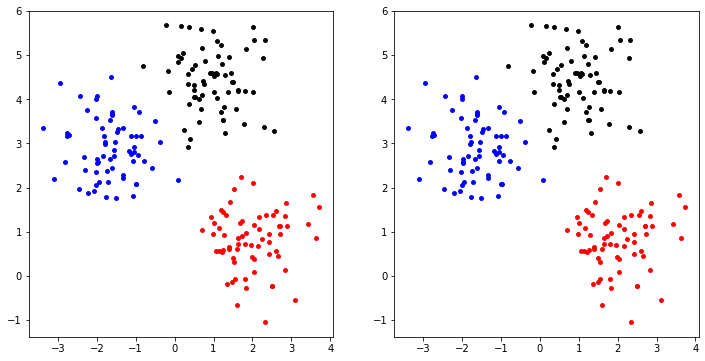

In [25]:
colors = ['k', 'r', 'b', 'o']
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
for i in np.unique(clusterDF['target']):
  targetDF = clusterDF[clusterDF['target'] == i]
  ax1.scatter(targetDF['ftr1'], targetDF['ftr2'], color=colors[i], s=15)

for i in np.unique(clusterDF['target_clusted']):
  targetDF = clusterDF[clusterDF['target_clusted'] == i]
  ax2.scatter(targetDF['ftr1'], targetDF['ftr2'], color=colors[i], s=15)

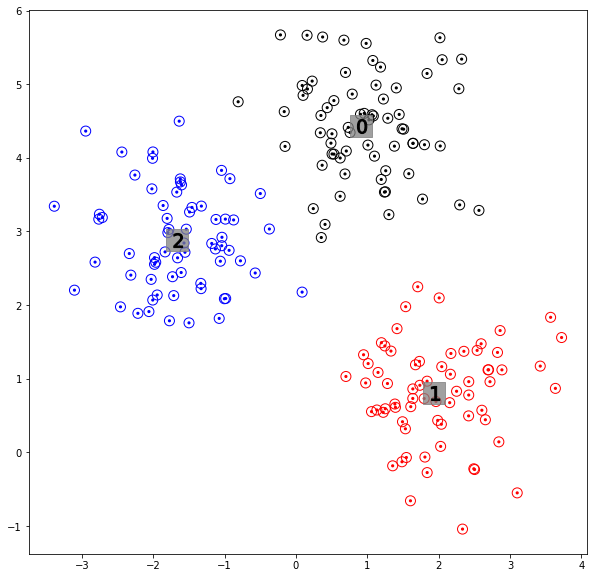

In [40]:
colors = ['k', 'r', 'b', 'o']

plt.figure(figsize=(10, 10))
for i in np.unique(clusterDF['target']):
  targetDF = clusterDF[clusterDF['target'] == i]
  plt.scatter(targetDF['ftr1'], targetDF['ftr2'], facecolor=colors[i], edgecolor="none", s=10, marker='o')

for i in np.unique(clusterDF['target_clusted']):
  targetDF = clusterDF[clusterDF['target_clusted'] == i]
  plt.scatter(targetDF['ftr1'], targetDF['ftr2'], facecolor="none", edgecolor=colors[i], s=100, marker='o')

centers = meanshift.cluster_centers_
for i, point in enumerate(centers):
  plt.scatter(point[0], point[1], s=500, color="gray", alpha=.75, marker="s")
  plt.scatter(point[0], point[1], s=200, color="k", edgecolor="k", marker='$%d$'%i)